In [151]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

### Loading dataset

In [152]:
X = np.load("./Sign-language-digits-dataset/X.npy")
Y = np.load("./Sign-language-digits-dataset/Y.npy")



(64, 64)
label: 8
1763


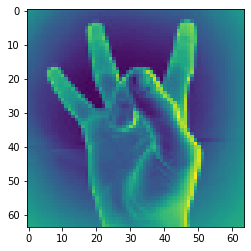

In [159]:
## Display some data

import random
index = random.randint(0, 2000)
imgplot = plt.imshow(X[index])
print(X[index].shape)
print("label: {}".format(np.where(Y[index] == 1)[0][0]))
print(index)


In [119]:
# Reshape X array
X = np.array(X.reshape(-1, 64, 64, 1))

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

### Creating training and saving model

In [122]:
#Create model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

#mod = Sequential()
#mod.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
#mod.add(Activation('relu'))
#mod.add(MaxPooling2D(pool_size=(2, 2)))

#mod.add(Conv2D(64, (3, 3)))
#mod.add(Activation('relu'))
#mod.add(MaxPooling2D(pool_size=(2, 2)))

#mod.add(Conv2D(32, (3, 3)))
#mod.add(Activation('relu'))
#mod.add(MaxPooling2D(pool_size=(2, 2)))

#mod.add(Conv2D(32, (3, 3)))
#mod.add(Activation('relu'))
#mod.add(MaxPooling2D(pool_size=(2, 2)))

#mod.add(Flatten())
#mod.add(Dense(128))
#mod.add(Activation('relu'))
#mod.add(Dense(128))
#mod.add(Activation('relu'))

#mod.add(Dense(10))
#mod.add(Activation('softmax'))

#mod.compile(loss='binary_crossentropy',
#              optimizer='rmsprop',
#              metrics=['accuracy'])

In [123]:
#mod.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

In [73]:
import pickle

#with open("cnn_model.p", "wb") as model_file:
#    pickle.dump(mod, model_file)
    

In [194]:
with open("cnn_model.p", "rb") as file:
    mod = pickle.load(file)

### Testing model on test data

In [195]:
y_1 = mod.predict_classes(X_test)

In [196]:
corr = 0
incorr = []
for y in range(0, len(y_1)):
    
    pred = y_1[y]
    act = np.where(y_test[y] == 1)[0][0]
    print("predicted: {}".format(pred))
    print("actual: {}".format(act))
     
    if(pred == act):
        corr += 1
    else:
        incorr.append((pred, act))
    print("")

print(corr/len(y_1))
print(incorr)

predicted: 2
actual: 2

predicted: 1
actual: 2

predicted: 7
actual: 7

predicted: 6
actual: 6

predicted: 0
actual: 0

predicted: 8
actual: 8

predicted: 3
actual: 3

predicted: 5
actual: 5

predicted: 7
actual: 7

predicted: 1
actual: 1

predicted: 2
actual: 2

predicted: 8
actual: 8

predicted: 4
actual: 4

predicted: 4
actual: 4

predicted: 8
actual: 8

predicted: 8
actual: 8

predicted: 0
actual: 0

predicted: 4
actual: 4

predicted: 5
actual: 5

predicted: 9
actual: 9

predicted: 1
actual: 1

predicted: 4
actual: 4

predicted: 2
actual: 2

predicted: 1
actual: 1

predicted: 7
actual: 7

predicted: 5
actual: 5

predicted: 8
actual: 8

predicted: 7
actual: 7

predicted: 7
actual: 7

predicted: 5
actual: 5

predicted: 6
actual: 6

predicted: 2
actual: 2

predicted: 4
actual: 4

predicted: 1
actual: 1

predicted: 6
actual: 6

predicted: 7
actual: 7

predicted: 7
actual: 7

predicted: 3
actual: 3

predicted: 0
actual: 0

predicted: 3
actual: 3

predicted: 5
actual: 5

predicted: 7
act

In [197]:
test_im = np.expand_dims(X_test[0], axis=0)

test_pred = mod.predict_classes(test_im)
print(test_pred)
print(y_test[0])

[2]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Testing model on real data

(64, 64)
(1, 64, 64, 1)
[5]


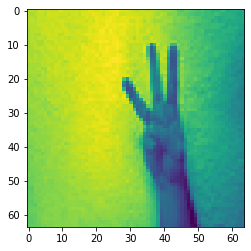

In [207]:
from PIL import Image, ImageOps

test =  Image.open('test_files/test_7.jpeg')
test = test.resize((64, 64), Image.ANTIALIAS)
test = ImageOps.grayscale(test)
test = np.asarray(test)
plt.imshow(test)

print(test.shape)
test = np.array(test.reshape(-1,64, 64, 1))
#test_9 = np.expand_dims(test_9, axis=0)
print(test.shape)
test_pred = mod.predict_classes(test)
print(test_pred)

### Reading input from video feed

In [163]:
import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    cv2.imshow('frame', frame)
    frame = frame.reshape(-1, 64, 64, 1)
    frame = np.expand_dims(frame, axis=0)
    pred = mod.predict_classes(frame)
    print(pred)
    print("")
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'